# MLOps Assessment


In [24]:
import os.path
import uuid

import numpy as np
# run this cell to create mnist_test.csv
import pandas as pd

# Download dataset
!wget -O mnist_test.csv https: // pjreddie.com / media / files / mnist_test.csv

# convert dataset to desired format
headers = "label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28".split(
    ",")
df = pd.read_csv("mnist_test.csv", names=headers)

print(df.shape)
display(df["label"].value_counts())

# save to csv
df.to_csv("mnist_test.csv", index=False)
new_df = pd.read_csv("mnist_test.csv")
# sanity check
print(new_df.shape)
display(new_df["label"].value_counts())
display(new_df.head())

--2022-11-27 11:27:44--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘mnist_test.csv’

mnist_test.csv      100%[===================>]  17.44M  2.07MB/s    in 34s     

2022-11-27 11:28:20 (529 KB/s) - ‘mnist_test.csv’ saved [18289443/18289443]

(10000, 785)


1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

(10000, 785)


1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



## Create Dataset **`(OBJECTIVE 1)`**
- - A sample of MNIST data (`mnist_test.csv`) will be created once provided code in notebook is executed
- Data Description
    - First column is `label`
    - Next 784 columns represents the pixel value of 28x28 image marked from `1x1, 1x2 ... 28x28`
-  Create Image dataset from the csv and store them in directories under `dataset`. Directory Structure will look like as shown below and each directory will contain  `~1000 images`



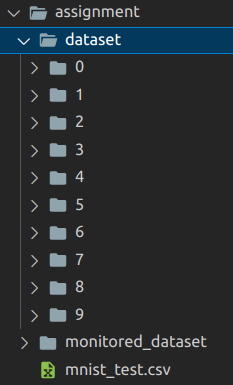

In [33]:
import numpy as np
import uuid
from PIL import Image
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [35]:
DATASET_FILE_PATH = "mnist_test.csv"
DATASET_ROOT_PATH = "./dataset"
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
batch_size = 2



In [27]:
def get_dataset_file(path: str):
    return pd.read_csv(path)


def save_dataset_in_folders(dataset):
    for index in range(row):
        arr = np.array(dataset.iloc[index])
        label = str(arr[0])
        image_in_arr = np.array(arr[1:], dtype=np.uint8)
        image_in_arr = image_in_arr.reshape((IMAGE_WIDTH, IMAGE_HEIGHT))

        # make a label directory
        image_dir = os.path.join(DATASET_ROOT_PATH, label)
        image_path = os.path.join(image_dir, uuid.uuid4().hex) + ".jpg"

        if not os.path.exists(image_dir):
            os.mkdir(image_dir)

        # save to image to the path
        im = Image.fromarray(image_in_arr)
        im.save(image_path)


In [28]:
mnist_test_csv_dataframe = get_dataset_file(DATASET_FILE_PATH)
columnsName = np.array(mnist_test_csv_dataframe.columns)
row, col = mnist_test_csv_dataframe.shape

if not os.path.exists(DATASET_ROOT_PATH):
    os.mkdir(DATASET_ROOT_PATH)
    save_dataset_in_folders(mnist_test_csv_dataframe)


In [31]:
# cross validation
image_count = len(list(Path(DATASET_ROOT_PATH).glob('*/*.jpg')))
print(image_count)
print(row)

10000
10000


In [56]:
# tensorflow Image Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_ROOT_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    color_mode="grayscale"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_ROOT_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 10000 files belonging to 10 classes.
Using 8000 files for training.
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


In [57]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


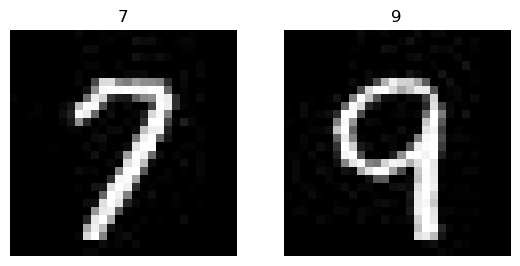

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
index = 0
for images, labels in train_ds.take(2):
    while index < 2:
        ax = plt.subplot(3, 3, index + 1)
        plt.imshow(images[index].numpy().astype("uint8"), cmap='gray')
        plt.title(class_names[labels[index]])
        plt.axis("off")
        index += 1

In [54]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(2, 28, 28, 1)
(2,)


In [58]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [59]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1. / 255, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(num_classes)
])

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
____________________________________________________

In [62]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/5
4000/4000 [==============================] - 27s 6ms/step - loss: 0.2798 - accuracy: 0.9165 - val_loss: 0.1273 - val_accuracy: 0.9605
Epoch 2/5
4000/4000 [==============================] - 24s 6ms/step - loss: 0.0895 - accuracy: 0.9732 - val_loss: 0.1052 - val_accuracy: 0.9630
Epoch 3/5
4000/4000 [==============================] - 40s 10ms/step - loss: 0.0528 - accuracy: 0.9846 - val_loss: 0.0953 - val_accuracy: 0.9705
Epoch 4/5
4000/4000 [==============================] - 33s 8ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0919 - val_accuracy: 0.9755
Epoch 5/5
4000/4000 [==============================] - 37s 9ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0832 - val_accuracy: 0.9770


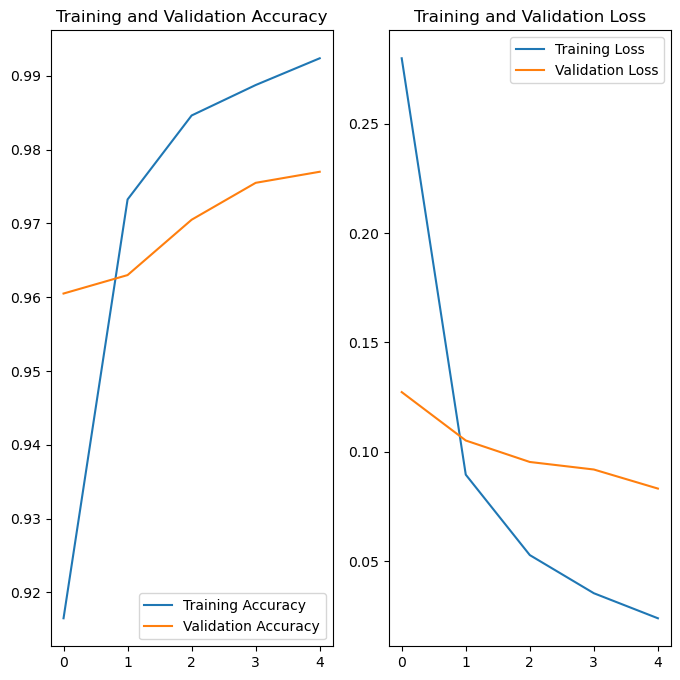

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [111]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
test_loss, test_acc

1000/1000 - 4s - loss: 0.0832 - accuracy: 0.9770 - 4s/epoch - 4ms/step


(0.08318585157394409, 0.9769999980926514)

In [64]:
model.save("saved-model/best-model")

2022-11-27 12:40:30.473527: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved-model/best-model/assets


In [66]:
# history.history

{'loss': [0.2798323333263397,
  0.0895458534359932,
  0.05279088392853737,
  0.03535928577184677,
  0.023914935067296028],
 'accuracy': [0.9164999723434448,
  0.9732499718666077,
  0.984624981880188,
  0.9887499809265137,
  0.9923750162124634],
 'val_loss': [0.1272772252559662,
  0.10515809059143066,
  0.09534423053264618,
  0.09190183132886887,
  0.08318585157394409],
 'val_accuracy': [0.9605000019073486,
  0.9629999995231628,
  0.9704999923706055,
  0.9754999876022339,
  0.9769999980926514]}

In [67]:
# save the history
import pickle

with open("saved-model/training_history.pickle", 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [117]:

y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images)
    pred_labels = tf.argmax(predictions,axis=1)

    # print(predictions.shape)
    # print(score.shape)
    # print(predictions)
    # print(score)
    y_true.extend(labels.numpy().ravel())
    y_pred.extend(pred_labels.numpy().ravel())


    # print(
    #     "This image most likely belongs to {} with a {:.2f} percent confidence."
    #     .format(class_names[np.argmax(score)], 100 * np.max(score))
    # )


In [118]:
print(len(y_true) ,len(y_pred))

2000 2000


In [119]:
# score.numpy()

In [120]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , cohen_kappa_score, roc_auc_score , confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


In [121]:
# image classification report

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_true, y_pred,average="micro")
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_true, y_pred,average="micro")
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, y_pred,average="micro")
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohens kappa: %f' % kappa)


Accuracy: 0.977000
Precision: 0.977000
Recall: 0.977000
F1 score: 0.977000
Cohens kappa: 0.974421
[[179   1   1   0   0   0   6   0   0   0]
 [  0 219   1   0   0   1   2   1   0   0]
 [  0   0 205   0   4   0   0   3   1   0]
 [  0   0   2 203   0   0   0   2   0   0]
 [  1   0   0   0 205   0   1   0   0   0]
 [  1   0   0   1   0 158   0   0   0   0]
 [  0   1   0   0   0   1 187   0   1   0]
 [  0   0   3   0   0   0   0 220   0   1]
 [  1   0   0   0   2   1   0   0 190   1]
 [  0   0   0   0   2   2   0   0   1 188]]


In [128]:
# ROC AUC
# auc = roc_auc_score(y_true, predictions[:,0],multi_class='ovr')
# print('ROC AUC: %f' % auc)

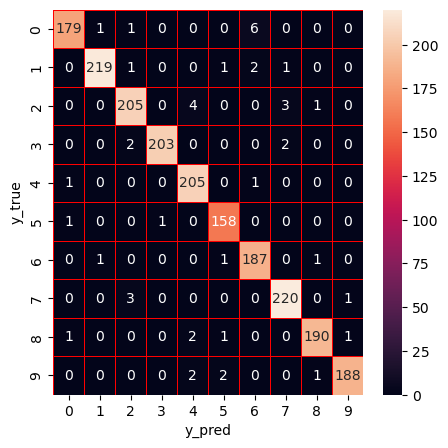

In [122]:
# # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm = confusion_matrix(y_true, y_pred)
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Develop a Classification MLOps Pipeline **`(OBECTIVE 2)`** 
- The pipeline should automatically retrain a new classification model as soon as there are `significant changes` in dataset. 
- Some of the major steps in pipeline can include: 
    - Monitor the dataset - `monitored_dataset` directory
        - if a new class is added with less than 200 examples - `Do Nothing`
        - if new class contains more than 200 examples - `trigger next step`
    - Split dataset into train/test/validation
    - Train classification model on train dataset with validation 
    - Generate and store classification report with evaluation metrics (`Precision`, `Recall`, `F1-score`) on test set.
- Any other improvement over this would be a plus.
- Consider the scenario given below for better understanding.

### Scenario 
- Initially, only classes `0` and `1` are available in `monitored_dataset` with ~500 samples each, then `start pipeline -> train model -> generate report`
- A new class `2` is added with 150 samples, `Do Nothing`
- Another 100 samples of class `3` are added, `Do Nothing`
- Another 100 samples of class `2` are added, `start pipeline` and train only for classes having greater than 200 samples i.e. `0, 1, 2`.
- And, so on.


----

In [132]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_ROOT_PATH,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    color_mode="grayscale"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_ROOT_PATH,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=batch_size,
    color_mode="grayscale"
)
class_names = train_ds.class_names

test_ds = val_ds.take(len(val_ds)//2)
val_ds = val_ds.skip(len(val_ds)-len(test_ds))


Found 10000 files belonging to 10 classes.
Using 7000 files for training.
Found 10000 files belonging to 10 classes.
Using 3000 files for validation.


In [133]:
len(test_ds),len(val_ds)

(750, 750)